# Eliminación de anomalías

### Carga de librerías

In [1]:
import cv2 as cv
import numpy as np
import random
from matplotlib import pyplot as plt

### Definición de funciones

In [2]:
#Funcion para mostrar imagenes
def showImage(title="Image",image=None, size=10):
    h,w=image.shape
    aspect_ratio=w/h
    plt.figure(figsize=(size*aspect_ratio,size))
    plt.imshow(cv.cvtColor(image,cv.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
#Se usa para instanciar la imagen con 0
def getArrayOfZeros(image=None):
    h,w=image.shape
    array=np.zeros((h,w),np.uint8)
    return array
    
"""
Para hacer el ruido se manda una probabilidad, esta probabilidad sirve para ver si el pixel va a cambiar
se obtiene un número random entre 0 y 100 de tal manera que si queda debajo de la probabilidad se hace el cambio
Y se tiene un 50% de ser 0 y ser 255
"""
def makeNoise(probability=0.15,array=[[]],image=None):
    probabilityint=int(probability*100)
    h,w=image.shape
    ruido=0
    for i in range(h):
        for j in range(w):
            rint=random.randint(0,100)   
            if(rint<probabilityint):
                ruido+=1
                array[i,j]=random.choice([0,255])
            else:
                array[i,j]=image[i,j]
    print('ruido',ruido)
    return array
"""
    Se hace un kernel cuadrado, se busca el punto medio para saber cuantos se deben de tener hacia Y y X
    luego si cabe el kernel completo se hace la operacion, en caso contrario se deje el valor inicial
    dejando los bordes. Luego se busca la mediana y se coloca el número en el centro del kernel
"""
def filterImage(image=None,kernel_size=3):
    new_image=getArrayOfZeros(image)
    half=kernel_size//2
    #la mitad para saber los bordes
    y,x=image.shape
    for i in range(y):
        for j in range(x):
            if i-half >=0 and i+half< y and j-half >= 0 and j+half<x:
                #procedemos a hacer el bloque y las operaciones
                kernel=image[i-half:i+half+1,j-half:j+half+1]
                median=np.median(kernel,axis=(0,1))
                new_image[i,j]=median
            else:
                new_image[i,j]=image[i,j]
    return new_image
    
#funcion para contar las diferencias
def countDifferences(base_image=None,final_image=None):
    y,x=base_image.shape
    differentPixels=0
    correctPixels=0
    for i in range(y):
        for j in range(x):
                if base_image[i,j]==final_image[i,j]:
                    correctPixels+=1
                else:
                    differentPixels+=1
    return (correctPixels,differentPixels)

# funcion para obtener el MSE
def getMSE(base_image=None,final_image=None):
    mse=np.mean((base_image-final_image)**2)
    rmse=np.sqrt(mse)
    return mse,rmse
        

### lectura de imágenes

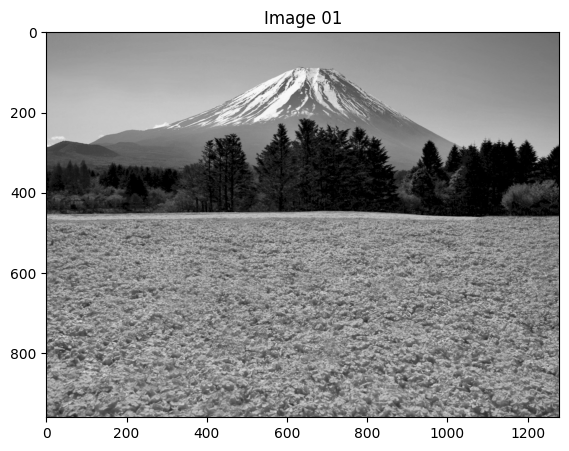

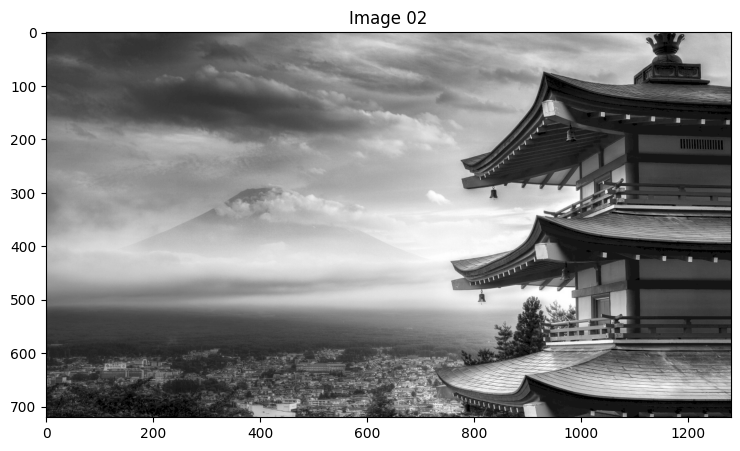

In [3]:
img01=cv.imread('img3.png',cv.IMREAD_GRAYSCALE)
img02=cv.imread('img4.png',cv.IMREAD_GRAYSCALE)

height_img01,width_img01=img01.shape
height_img02,width_img02=img02.shape

#img01
showImage("Image 01",img01,5)
showImage("Image 02",img02,5)

### Agregación de sal y pimienta

In [4]:
array_img01=getArrayOfZeros(img01)
array_img02=getArrayOfZeros(img02)
array_img01

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [5]:
probability=0.15
noise_img01=makeNoise(probability,array_img01,img01)
##segunda imagen
noise_img02=makeNoise(probability,array_img02,img02)
noise_img02

ruido 182886
ruido 136514


array([[ 56,  56,  59, ..., 213, 211, 213],
       [ 59,  59, 255, ..., 210, 209, 211],
       [ 59,  59,  59, ..., 207, 206, 206],
       ...,
       [255,  28,  28, ...,  39,  39,  39],
       [ 21,  28,  28, ...,   0,  43,  43],
       [ 21,  21,  21, ...,  43,  43,  46]], dtype=uint8)

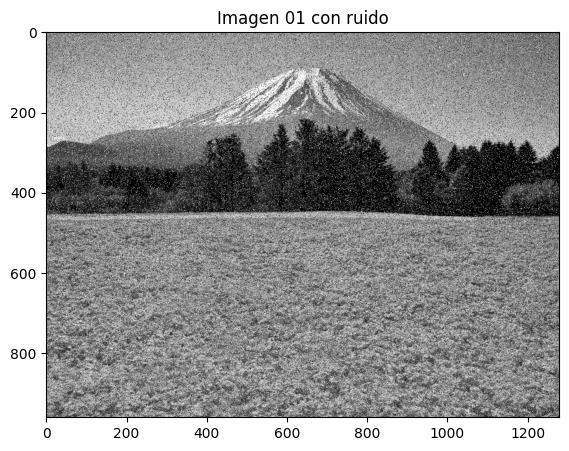

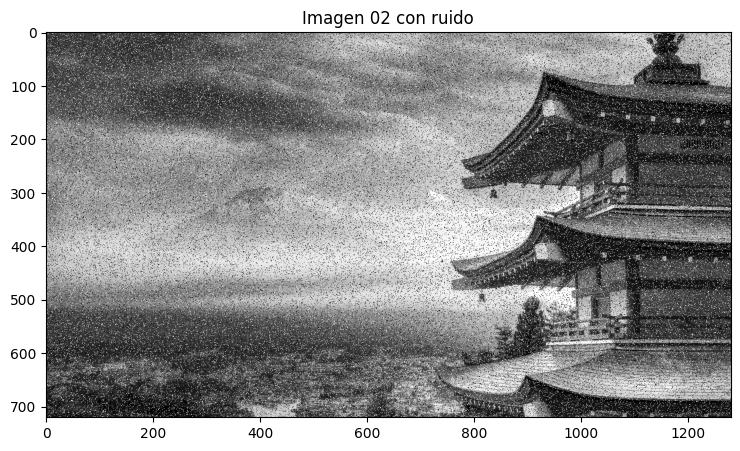

In [6]:
showImage("Imagen 01 con ruido",noise_img01,5)
showImage("Imagen 02 con ruido",noise_img02,5)

## Eliminación de Anomalía

### Método propio (Usando Filtro de Mediana)

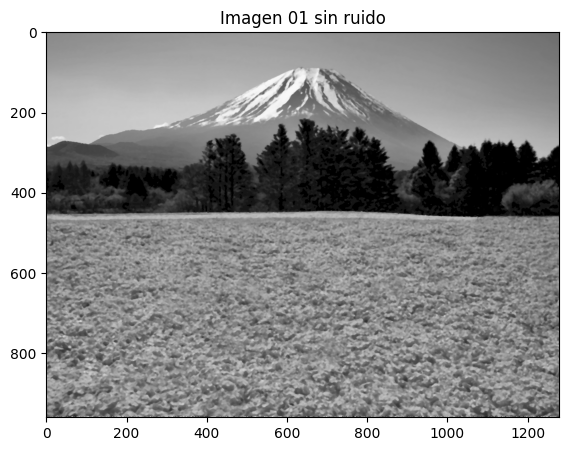

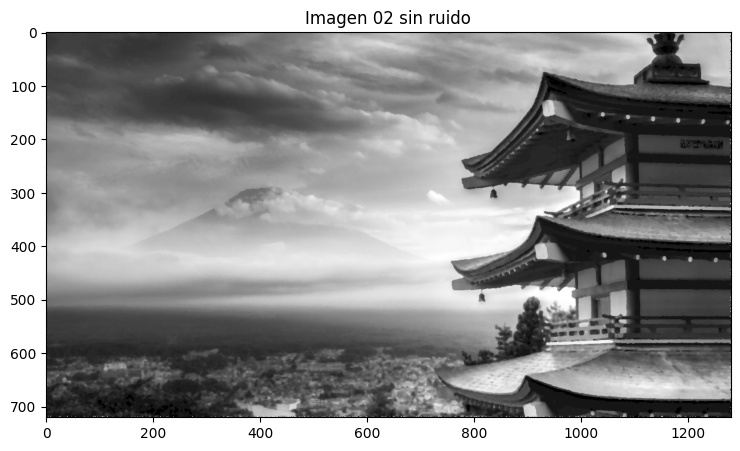

In [7]:
kernel_size=5
# Creamos el kernel
filtered_image01=filterImage(noise_img01,kernel_size)
showImage("Imagen 01 sin ruido",filtered_image01,5)
filtered_image02=filterImage(noise_img02,kernel_size)
showImage("Imagen 02 sin ruido",filtered_image02,5)

### Método utilizando OpenCV

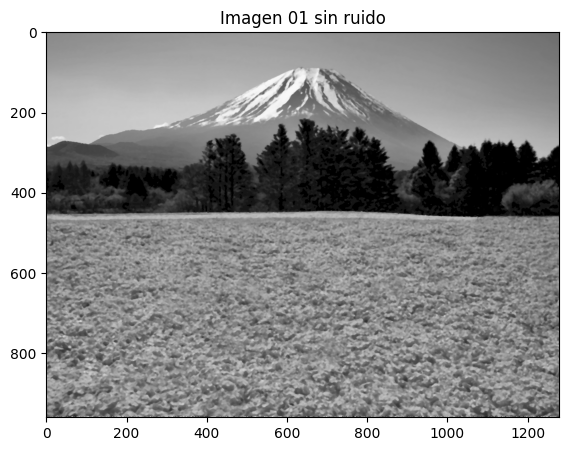

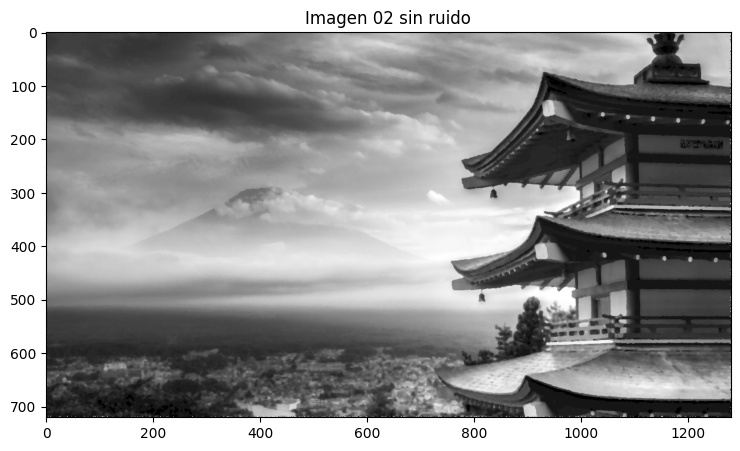

In [8]:
filtered_using_cv_img01=cv.medianBlur(noise_img01,5)
showImage("Imagen 01 sin ruido",filtered_image01,5)

#imagen 02
filtered_using_cv_img02=cv.medianBlur(noise_img02,5)
showImage("Imagen 02 sin ruido",filtered_image02,5)

## Análisis de diferencias

### Calculando las diferencias entre píxeles (Método propio)

In [9]:
differences_image01=countDifferences(img01,filtered_image01)
differences_image02=countDifferences(img02,filtered_image02)
mse_img01,rmse_img01=getMSE(img01,filtered_image01)
mse_img02,rmse_img02=getMSE(img02,filtered_image02)
print("-----------------------IMAGEN 01-----------------------")
print('Datos correctos: ',differences_image01[0], '--- Datos incorrectos:',differences_image01[1])
print('Error Cuadrático Medio(MSE):', mse_img01,' Raíz del Error Cuadrático Medio(RMSE):',rmse_img01)
print("-----------------------IMAGEN 02-----------------------")
print('Datos correctos: ',differences_image02[0], '--- Datos incorrectos:',differences_image02[1])
print('Error Cuadrático Medio(MSE):', mse_img02,' Raíz del Error Cuadrático Medio(RMSE):',rmse_img02)

-----------------------IMAGEN 01-----------------------
Datos correctos:  375017 --- Datos incorrectos: 853783
Error Cuadrático Medio(MSE): 47.525072428385414  Raíz del Error Cuadrático Medio(RMSE): 6.893843081212787
-----------------------IMAGEN 02-----------------------
Datos correctos:  329587 --- Datos incorrectos: 592013
Error Cuadrático Medio(MSE): 20.503614366319443  Raíz del Error Cuadrático Medio(RMSE): 4.528091691465561


### Calculando las diferencias entre píxeles (CV2)

In [10]:
differences_image01_cv=countDifferences(img01,filtered_using_cv_img01)
differences_image02_cv=countDifferences(img02,filtered_using_cv_img02)
mse_img01_cv,rmse_img01_cv=getMSE(img01,filtered_using_cv_img01)
mse_img02_cv,rmse_img02_cv=getMSE(img02,filtered_using_cv_img02)
print("-----------------------IMAGEN 01-----------------------")
print('Datos correctos: ',differences_image01_cv[0], '--- Datos incorrectos:',differences_image01_cv[1])
print('Error Cuadrático Medio(MSE):', mse_img01_cv,' Raíz del Error Cuadrático Medio(RMSE):',rmse_img01_cv)
print("-----------------------IMAGEN 02-----------------------")
print('Datos correctos: ',differences_image02_cv[0], '--- Datos incorrectos:',differences_image02_cv[1])
print('Error Cuadrático Medio(MSE):', mse_img02_cv,' Raíz del Error Cuadrático Medio(RMSE):',rmse_img02_cv)

-----------------------IMAGEN 01-----------------------
Datos correctos:  371282 --- Datos incorrectos: 857518
Error Cuadrático Medio(MSE): 47.654903157552084  Raíz del Error Cuadrático Medio(RMSE): 6.90325308514414
-----------------------IMAGEN 02-----------------------
Datos correctos:  325923 --- Datos incorrectos: 595677
Error Cuadrático Medio(MSE): 20.589026692708334  Raíz del Error Cuadrático Medio(RMSE): 4.537513271904373


## Conclusión

El método desarrollado personalmente es mas eficiente que el modelo equivalente de la librería opencv, tiene un mayor de aciertos en cantidad de pixeles que son los correctos comparados a la realizada por open cv. El cual nos da un error de cuadrado medio más pequeño el cual nos indica que se acerca mas a la imagen original. El problema es a nivel de rendimiento ya que opencv es mas rápido.  